In [1]:
tested_qubits = {('1', '2'),
 ('13', '14'),
 ('15', '23'),
 ('16', '17'),
 ('19', '27'),
 ('20', '28'),
 ('21', '22'),
 ('24', '32'),
 ('25', '26'),
 ('29', '30'),
 ('3', '4'),
 ('33', '34'),
 ('35', '43'),
 ('36', '44'),
 ('37', '45'),
 ('38', '39'),
 ('41', '47'),
 ('48', '52'),
 ('5', '11'),
 ('50', '51'),
 ('53', '54'),
 ('6', '12'),
 ('9', '10')}

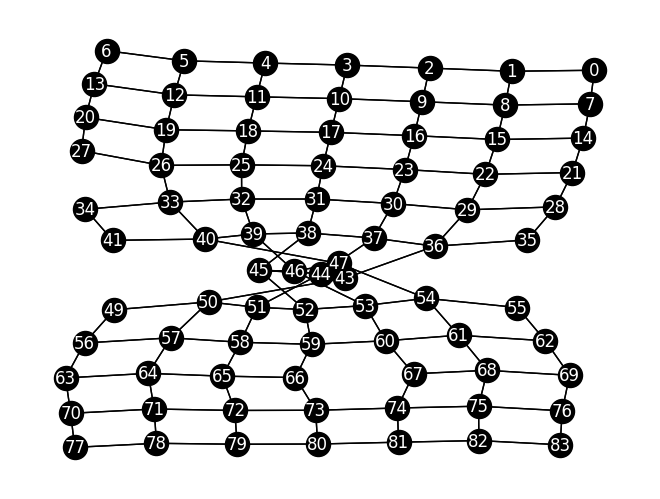

Efficiency: 0.5609756097560976


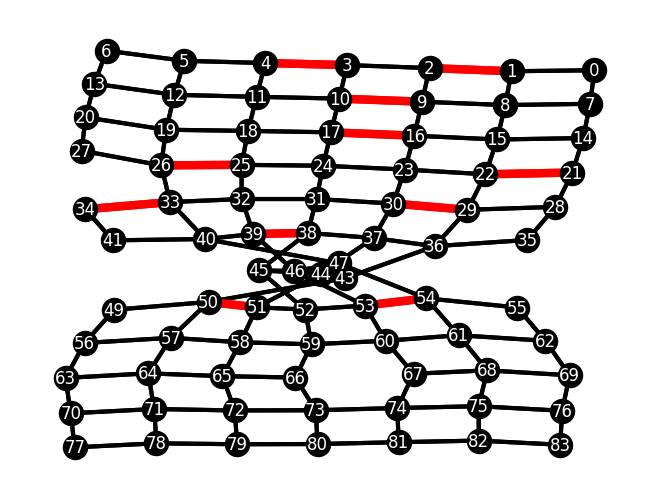

In [2]:
import networkx as nx
from braket.aws import AwsDevice
from braket.circuits import Circuit
from braket.devices import Devices
import matplotlib.pyplot as plt
from math import pi

Ankaa_device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3")
G = Ankaa_device.topology_graph
nx.draw_kamada_kawai(G, with_labels=True, node_color = 'black' ,font_color="white", arrows=False)
plt.show()

total_connectivity = Ankaa_device.properties.paradigm.connectivity.connectivityGraph
qubits = [qub for qub in total_connectivity]
qubits.sort(key=float)

red_edges = list(tested_qubits)
connected_qubits = [str(qub_pair[0]) for qub_pair in red_edges] + [str(qub_pair[1]) for qub_pair in red_edges]
connected_qubits.sort(key=float)
# print("Connected Qubits:\n",connected_qubits,"\n")
# print("Total Qubits:\n",qubits,"\n")
print("Efficiency:", len(connected_qubits)/len(qubits))

# 3. Create a color map based on G.edges()
edge_colors = []
widths = []
for u, v in G.edges():
    u = str(u)
    v = str(v)
    # Check if the edge (or its reverse) is in your red_subset
    if (u, v) in red_edges or (v, u) in red_edges:
        edge_colors.append('red')
        widths.append(6)
    else:
        edge_colors.append('black')
        widths.append(3)

black_edges = [e for e in G.edges() if e not in red_edges and (e[1], e[0]) not in red_edges]

nx.draw_kamada_kawai(G, with_labels=True, edge_color=edge_colors, node_color = 'black' ,font_color="white", width = widths, arrows=False)
plt.show()


